<a href="https://colab.research.google.com/github/raminass/deep-NMF/blob/master/Ongoing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Background
NMF receives input matrix $V_{(FxN)}$ and number of factors $K$.

And it outputs non-negative matrices $W_{FxK}$, $H_{KxN}$: 

>>>> $V \approx WH$

Solve:

>>>>$\hat{W},\hat{H} = \underset{W\geq0,H\geq0}{\operatorname{argmin}} d_{\beta}(V|WH)$ 


Method

 1.  MU *(Févotte et al., 2009)*:



>>>>$H \gets H \odot \dfrac{W^T[V \odot(WH)^{\beta-2}]}{W^T(WH)^{\beta-1}}$

>>>>$W \gets H \odot \dfrac{W^T[V \odot(WH)^{\beta-2}]}{W^T(WH)^{\beta-1}}$



### Our Problem - Case 1 (Euc)

Given:
1. an input sample $v\in{R^{f}}$
2. dictionary $W\in\mathbb R^{f x k}_{\ge 0}$

We seek $h\in\mathbb R^{k}_{\ge 0}$:

>>$\underset{h\geq0}{\operatorname{min}} \| v - Wh \|^2_F$ 

A popular method of solving this iterativly is the Multiplicative update(Lee,Seung):


>>$ h^{l+1} \gets h^l \odot \dfrac{W^tv}{W^tWh^l},\space \beta=2$

$\odot, \dfrac{[.]}{[.]}$ denotes component-wise multiplication, division respectivly.

#### Unrolling(EUC)
In the unrolled network implicit subtitution of the parameters has been made as follow:

>>$W_1 = W^t$

>>$W_2 = W^tW$

So a netwrok layer will perform the following:

$h^{l+1} \gets h^l \odot \dfrac{W^l_1v}{W^l_2h^l}$

The network trained using truth dataset to optimize the parameters($W_1,W_2$),

$v_1, v_2, ... v_N \in R^f$ and their corresponding coeffecient vectors $h_1, h_2, ... h_N \in R^k$


Training proceedure:

*  feed $v_i$
*  feed initial $h^{0}_i$
*  retrieve output $\hat{h}_i$
*  calculate Loss = $MSE(h_i,\hat{h}_i$)

The network is trained through minimizing the loss function, the weights/parameters are updated using constrained gradeint decent to keep them non-negative.




### scheme of Layer

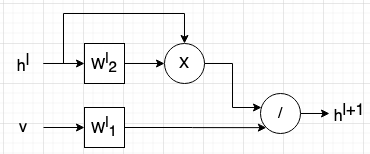

$W_1$ module:

*   $v \in \mathbb{R^f}$ - input vector
*   $a^{l+1} \in \mathbb{R^c}$ - output vector
*   $W^{l}_1 \in \mathbb{R}^{f,c}$ - weights matrix
*   $W^{l}_1v^{l}_i = a^{l+1}_i$

$W_2$ module:

*   $h \in \mathbb{R^c}$ - input vector 
*   $b \in \mathbb{R^f}$ - output vector
*   $W^{l}_2 \in \mathbb{R}^{c,f}$ - weights matrix
*   $W^{l}_2h^{l}_i = b^{l+1}_i$
